<a href="https://colab.research.google.com/github/GayathriGalli/umbc_data690_fall2024/blob/main/Assignment/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 05

In [1]:
import pandas as pd
import plotly.express as px

pd.set_option("display.max_rows", None)

df = pd.read_csv("https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/fall2024/data/World_Development_Indicators_(WDI).csv")

df.shape

(4123, 9)

In [2]:
df.sample(5)

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
2149,2006,Libya,10060.361041,71.724,5973369.0,LBY,Middle East & North Africa,Upper middle income,IBRD
3130,2018,San Marino,48464.524648,NaN,34156.0,SMR,Europe & Central Asia,High income,Not classified
1728,2022,Indonesia,4787.999308,NaN,275501339.0,IDN,East Asia & Pacific,Upper middle income,IBRD
2463,2016,Moldova,2847.635069,69.917,2803186.0,MDA,Europe & Central Asia,Upper middle income,IBRD
2527,2004,Morocco,2177.798828,68.231,30033125.0,MAR,Middle East & North Africa,Lower middle income,IBRD


In [3]:
df.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),161
"Life expectancy at birth, total (years)",346
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [4]:
df[["Year", "Country","GDP per capita (current US$)", "Life expectancy at birth, total (years)"]].sample(5)

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)"
1412,2010,Ghana,1258.964197,61.157000
331,2012,Belarus,6953.215917,71.965854
1617,2006,Honduras,1409.579748,70.261000
1905,2009,Kazakhstan,7165.224778,68.390000
1177,2022,Eritrea,NaN,NaN


In [5]:
df_2022 = df[df["Year"] != 2022]
df_2022.shape

(3906, 9)

In [6]:
df_2022.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),140
"Life expectancy at birth, total (years)",129
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [7]:
df_2022 = df_2022.dropna()
df_2022.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),0
"Life expectancy at birth, total (years)",0
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [8]:
df_2022.shape

(3641, 9)

## Homework Question 1:

to check if this dataset has duplicate rows. If it has, only keep one from the duplicated rows and drop the rest.

In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()]

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type


In [11]:
df_cleaned = df.drop_duplicates()

print(f"Cleaned shape: {df_cleaned.shape}")
print(df_cleaned.sample(5))


Cleaned shape: (4123, 9)
      Year                Country  GDP per capita (current US$)  \
3653  2009               Thailand                   4154.187447   
2675  2019          New Caledonia                  34934.579430   
2204  2004             Luxembourg                  76544.917087   
2442  2014  Micronesia, Fed. Sts.                   2928.448782   
2295  2019               Malaysia                  11132.102743   

      Life expectancy at birth, total (years)  Population, total Country Code  \
3653                                75.842000         67813654.0          THA   
2675                                80.419707           271240.0          NCL   
2204                                79.121951           458095.0          LUX   
2442                                71.529000           109024.0          FSM   
2295                                75.760000         32804020.0          MYS   

                     Region         Income Group    Lending Type  
3653    East Asia 

## HW Question 2

Find out if there is a relationship between wealth and health

Pick any year worth of data and use plotly express to generate a scatter plot with GDP as x and life expectancy as y.

In [12]:
year_of_interest = 2019

df_2019 = df[df["Year"] == year_of_interest]
print(df_2019.shape)
df_2019.sample(5)


(217, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
319,2019,Barbados,19063.102291,77.257000,280180.0,BRB,Latin America & Caribbean,High income,Not classified
718,2019,Central African Republic,426.408753,55.025000,5209324.0,CAF,Sub-Saharan Africa,Low income,IDA
946,2019,Cuba,9139.380510,77.611000,11316697.0,CUB,Latin America & Caribbean,Upper middle income,Not classified
186,2019,Aruba,31902.809818,76.248000,106442.0,ABW,Latin America & Caribbean,High income,Not classified
3074,2019,Russian Federation,11536.258789,73.083902,144406261.0,RUS,Europe & Central Asia,Upper middle income,IBRD


In [13]:
df_2019.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),6
"Life expectancy at birth, total (years)",8
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [14]:
df_2019 = df_2019.dropna(subset=["GDP per capita (current US$)", "Life expectancy at birth, total (years)"])
print(df_2019.shape)
df_2019.sample(5)

(203, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
3758,2019,Tunisia,3477.836181,75.993000,12049314.0,TUN,Middle East & North Africa,Lower middle income,IBRD
1592,2019,Guyana,6477.296726,69.124000,798753.0,GUY,Latin America & Caribbean,High income,IDA
2181,2019,Liechtenstein,167259.160312,84.160976,38482.0,LIE,Europe & Central Asia,High income,Not classified
1383,2019,Georgia,4696.150586,73.470000,3720161.0,GEO,Europe & Central Asia,Upper middle income,IBRD
243,2019,Azerbaijan,4805.753718,73.102000,10024283.0,AZE,Europe & Central Asia,Upper middle income,IBRD


In [15]:

fig = px.scatter(
    df_2019,
    x="GDP per capita (current US$)",
    y="Life expectancy at birth, total (years)",
    color="Country",
    size="Population, total",
    title=f"Relationship between GDP per Capita and Life Expectancy in {year_of_interest}",
    labels={
        "GDP per capita (current US$)": "GDP per Capita (Current US$)",
        "Life expectancy at birth, total (years)": "Life Expectancy (Years)"
    }
)

fig.show()

## Compare China, US, India, Russia

In [16]:
df_4_countries = df_2019[df_2019["Country Code"].isin(["USA", "CHN", "IND", "RUS"])]
print(df_4_countries.shape)
df_4_countries

(4, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
794,2019,China,10143.860221,77.968000,1.407745e+09,CHN,East Asia & Pacific,Upper middle income,IBRD
1706,2019,India,2050.163800,70.910000,1.383112e+09,IND,South Asia,Lower middle income,IBRD
3074,2019,Russian Federation,11536.258789,73.083902,1.444063e+08,RUS,Europe & Central Asia,Upper middle income,IBRD
3929,2019,United States,65120.394663,78.787805,3.283300e+08,USA,North America,High income,Not classified


In [17]:

fig = px.scatter(
    df_4_countries,
    x="GDP per capita (current US$)",
    y="Life expectancy at birth, total (years)",
    color="Country",
    text="Country",
    size="Population, total",
    title=f"Relationship between GDP per Capita and Life Expectancy in {year_of_interest}",
    labels={
        "GDP per capita (current US$)": "GDP per Capita (Current US$)",
        "Life expectancy at birth, total (years)": "Life Expectancy (Years)"
    },
    height=600,
    width=1000
)

# Update text position
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)

fig.show()

In [18]:
df_quad = df[df["Country Code"].isin(["USA", "CHN", "IND", "RUS"])]
print(df_quad.shape)
df_quad.sample(5)

(76, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
3930,2020,United States,63528.634303,76.980488,3.315115e+08,USA,North America,High income,Not classified
780,2005,China,1753.414192,74.111000,1.303720e+09,CHN,East Asia & Pacific,Upper middle income,IBRD
3068,2013,Russian Federation,15974.622070,70.578780,1.435070e+08,RUS,Europe & Central Asia,Upper middle income,IBRD
3916,2006,United States,46302.000880,77.687805,2.983799e+08,USA,North America,High income,Not classified
797,2022,China,12720.216318,NaN,1.412175e+09,CHN,East Asia & Pacific,Upper middle income,IBRD


In [19]:
fig = px.line(
    df_quad,
    x="Year",
    color="Country",
    y="GDP per capita (current US$)"
)

fig.show()

In [20]:
df_group = df.groupby(["Year", "Region"])["Population, total"].sum().reset_index()
df_group

,Year,Region,"Population, total"
0,2004,East Asia & Pacific,2.094011e+09
1,2004,Europe & Central Asia,8.702708e+08
2,2004,Latin America & Caribbean,5.498976e+08
3,2004,Middle East & North Africa,3.470449e+08
4,2004,North America,3.248097e+08
5,2004,South Asia,1.515703e+09
6,2004,Sub-Saharan Africa,7.465468e+08
7,2005,East Asia & Pacific,2.109795e+09
8,2005,Europe & Central Asia,8.729137e+08
9,2005,Latin America & Caribbean,5.567395e+08


Home work #5
Pick a few countries of your interest (for example, G7, BRICS, Nordic countries).
- 1 Create a line chart showing the trend of Life Expectancy over time for comparing those countries.
- 2 Pick a year from the data of the above few countries and create a scatter plot to compare their GDP per capita and life expectancy. The size of the dots represent the population. This type of scatter plot is called bubble chart.
- 3 Bonus - compute the average GDP per capita, the average life expectancy, and the total population for each year of all the seven regions (aggregation) and repeat 1 and 2 using the aggregated data for all regions

In [21]:
print(df.columns)


Index(['Year', 'Country', 'GDP per capita (current US$)',
       'Life expectancy at birth, total (years)', 'Population, total',
       'Country Code', 'Region', 'Income Group', 'Lending Type'],
      dtype='object')


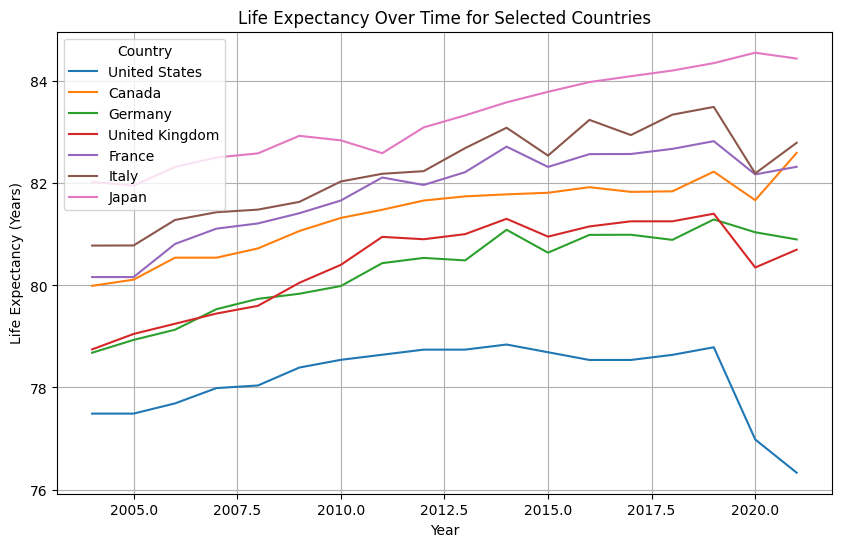

In [22]:
import matplotlib.pyplot as plt

# Select countries of interest (e.g., G7: USA, Canada, Germany, UK, France, Italy, Japan)
selected_countries = ['United States', 'Canada', 'Germany', 'United Kingdom', 'France', 'Italy', 'Japan']

# Filter the data for the selected countries
df_selected = df[df['Country'].isin(selected_countries)]

# Create a line plot for Life Expectancy over time using the correct column name
plt.figure(figsize=(10,6))

for country in selected_countries:
    country_data = df_selected[df_selected['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy at birth, total (years)'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.title('Life Expectancy Over Time for Selected Countries')
plt.legend(title='Country')
plt.grid(True)
plt.show()


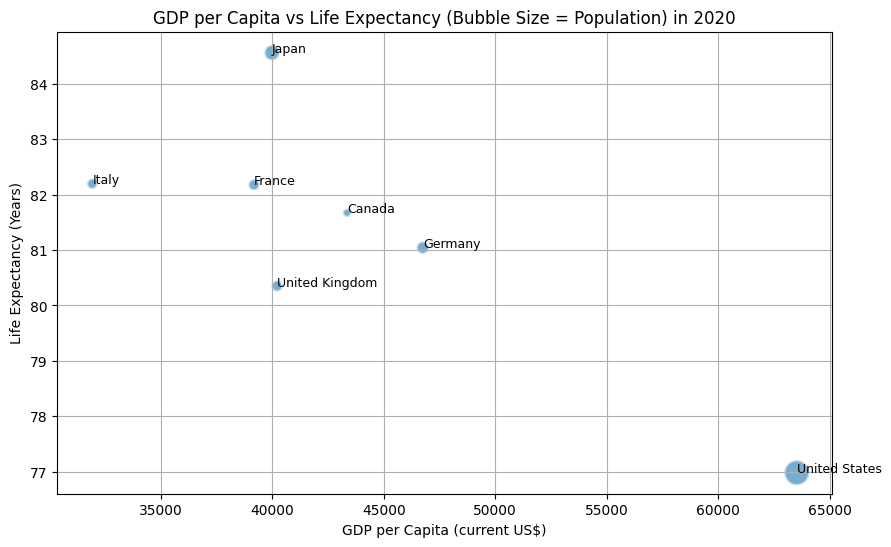

In [23]:
selected_year = 2020

df_filtered = df[(df['Country'].isin(selected_countries)) & (df['Year'] == selected_year)]

plt.figure(figsize=(10,6))

plt.scatter(df_filtered['GDP per capita (current US$)'],
            df_filtered['Life expectancy at birth, total (years)'],
            s=df_filtered['Population, total'] / 1e6,  # Bubble size proportional to population (scaled down for better visualization)
            alpha=0.6, edgecolors='w', linewidth=2)

for i, country in enumerate(df_filtered['Country']):
    plt.text(df_filtered['GDP per capita (current US$)'].iloc[i],
             df_filtered['Life expectancy at birth, total (years)'].iloc[i],
             country, fontsize=9)

plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Life Expectancy (Years)')
plt.title(f'GDP per Capita vs Life Expectancy (Bubble Size = Population) in {selected_year}')
plt.grid(True)

plt.show()


    Year  Average GDP per Capita  Average Life Expectancy  Total Population
0   2004            11732.827378                68.591499      6.448284e+09
1   2005            12711.862040                68.897906      6.529978e+09
2   2006            14248.294774                69.249848      6.612296e+09
3   2007            16250.609528                69.554080      6.694666e+09
4   2008            17351.393562                69.885981      6.778447e+09
5   2009            15445.454676                70.273578      6.862594e+09
6   2010            16135.528397                70.580052      6.946847e+09
7   2011            17750.935754                70.972012      7.030864e+09
8   2012            17631.642030                71.277017      7.118125e+09
9   2013            18203.792235                71.533768      7.205959e+09
10  2014            18561.806261                71.803422      7.293648e+09
11  2015            16765.359172                72.002561      7.380389e+09
12  2016    

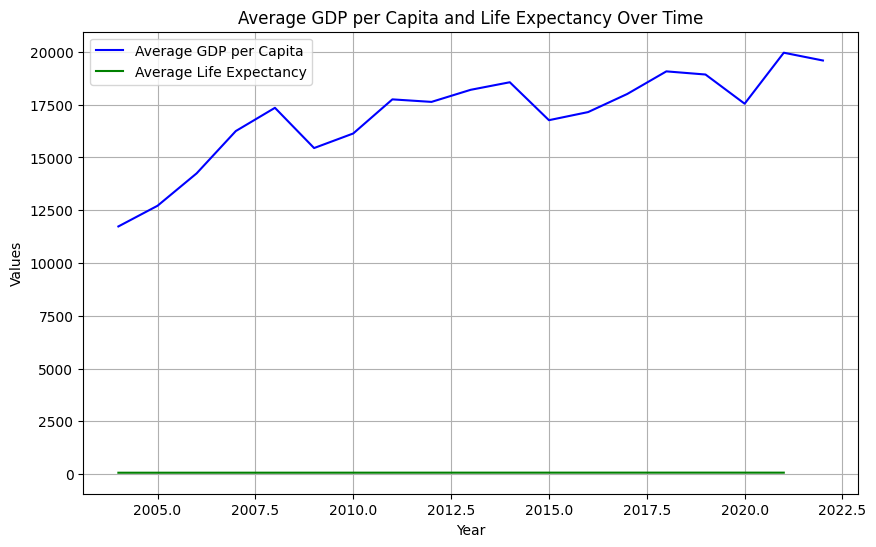

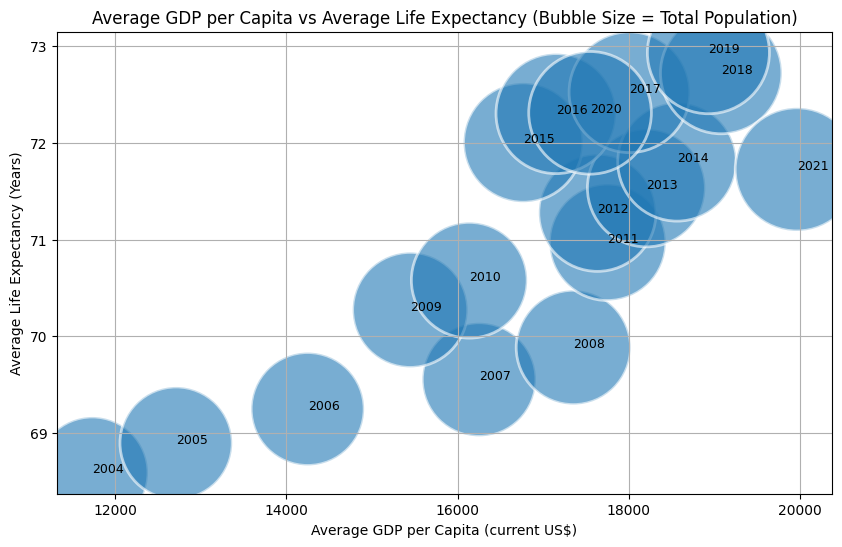

In [24]:
agg_data = df.groupby('Year').agg({
    'GDP per capita (current US$)': 'mean',
    'Life expectancy at birth, total (years)': 'mean',
    'Population, total': 'sum'
}).reset_index()

agg_data.columns = ['Year', 'Average GDP per Capita', 'Average Life Expectancy', 'Total Population']

print(agg_data)

plt.figure(figsize=(10, 6))

plt.plot(agg_data['Year'], agg_data['Average GDP per Capita'], label='Average GDP per Capita', color='blue')

plt.plot(agg_data['Year'], agg_data['Average Life Expectancy'], label='Average Life Expectancy', color='green')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Average GDP per Capita and Life Expectancy Over Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.scatter(agg_data['Average GDP per Capita'],
            agg_data['Average Life Expectancy'],
            s=agg_data['Total Population'] / 1e6,
            alpha=0.6, edgecolors='w', linewidth=2)

for i, year in enumerate(agg_data['Year']):
    plt.text(agg_data['Average GDP per Capita'].iloc[i],
             agg_data['Average Life Expectancy'].iloc[i],
             year, fontsize=9)


plt.xlabel('Average GDP per Capita (current US$)')
plt.ylabel('Average Life Expectancy (Years)')
plt.title('Average GDP per Capita vs Average Life Expectancy (Bubble Size = Total Population)')
plt.grid(True)

plt.show()
